In [1]:
import os
import glob

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def print_test_from_filename(test_name):
    fpath = os.path.join(os.getcwd(), "datasets", test_name + ".tsp")
    
    if not os.path.isfile(fpath):
        print('File does not exist.')
    else:
        with open(fpath) as f:
            content = f.read().splitlines()
        
        start = 0;
        for i in range(len(content)):
            content[i] = content[i].strip()
                    
        for i in range(len(content)):
            if content[i] == "NODE_COORD_SECTION":
                start = i + 1;
                
        if start == 0:
            return None;
        return content[start:-1]
    
def print_test_from_filepath(fpath):    
    if not os.path.isfile(fpath):
        print('File does not exist.')
    else:
        with open(fpath) as f:
            content = f.read().splitlines()
            
        
        start = 0;
        content_size = 0;
        for i in range(len(content)):
            content[i] = content[i].strip()
            
            tokens = content[i].split(":")
            for token in tokens:
                token = token.strip()
            
            if tokens[0] == "DIMENSION":
                content_size = int(tokens[1])
            
            if content[i] == "NODE_COORD_SECTION":
                start = i + 1;
                break;
                
        if start == 0:
            return None;
        
        content = content[start:]
    
        if content_size != len(content):
            new_content = []
            for line in content:
                if line != "EOF" and len(line) > 4:
                    new_content.append(line)
            return new_content
        
        return content
    

In [3]:
def get_x_and_y(content, fpath):
    x = []
    y = []
    for line in content:
        tokens = line.split()
        if (len(tokens) != 3):
            print("invalid tokens: ", fpath, tokens)
        x.append(float(tokens[1]))
        y.append(float(tokens[2]))
        
    return x, y



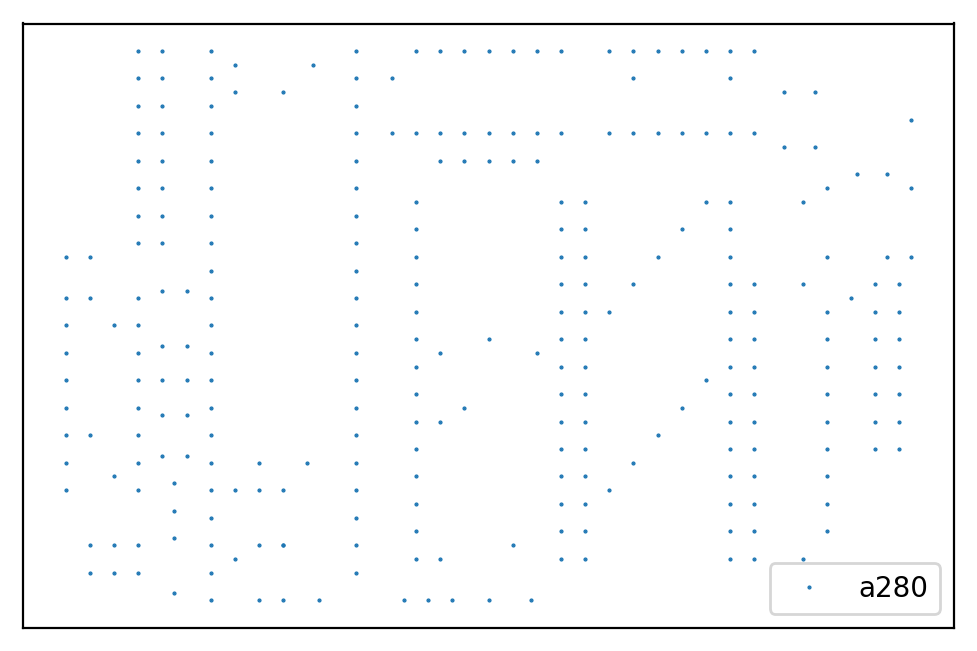

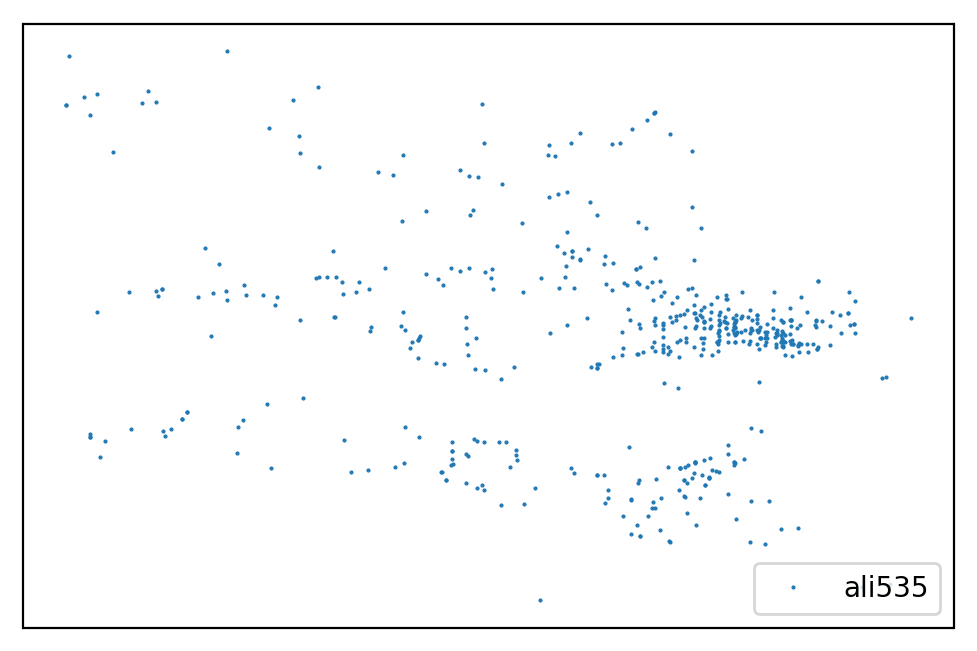

In [4]:
all_test_paths = sorted(glob.glob(os.path.join(os.getcwd(), "datasets", "*.tsp")))
tests_amount = len(all_test_paths)
tests_amount = 2

for i in range(tests_amount):
    points = print_test_from_filepath(all_test_paths[i])
    test_name = all_test_paths[i].split("/")[-1][:-4];
    if (points != None):
        x, y = get_x_and_y(points, all_test_paths[i])

        fig, ax = plt.subplots(dpi=200)
        
        plt.plot(x, y, 'o', marker='.', markersize=1, scalex=True, scaley=True, label=test_name)
        plt.legend(loc='lower right')
        plt.xticks([], [])
        plt.yticks([], [])
        plt.show()
    else:
        print("matrix in test {}".format(test_name))
        
        

In [5]:
def print_tour_from_filepath(fpath):    
    if not os.path.isfile(fpath):
        print('File does not exist.')
    else:
        with open(fpath) as f:
            content = f.read().splitlines()
            
        
        start = 0;
        content_size = 0;
        for i in range(len(content)):
            content[i] = content[i].strip()
            
            tokens = content[i].split(":")
            for token in tokens:
                token = token.strip()
            
            if tokens[0] == "DIMENSION":
                content_size = int(tokens[1])
            
            if content[i] == "TOUR_SECTION":
                start = i + 1;
                break;
                
        if start == 0:
            return None;
        
        content = content[start:]
    
        if content_size != len(content):
            new_content = []
            for line in content:
                if line != "EOF" and int(line) != -1:
                    new_content.append(line)
                    
            print("size ", len(new_content), content_size)
            return new_content
        
        return content

size  280 0


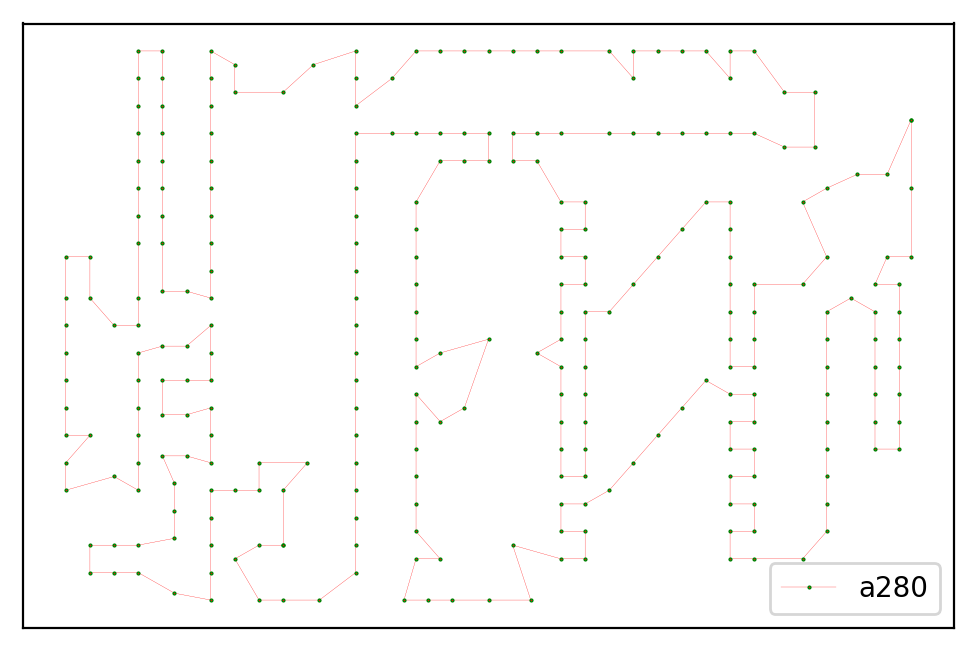

size  48 0
test ali535 doesn't have tour
size  48 0


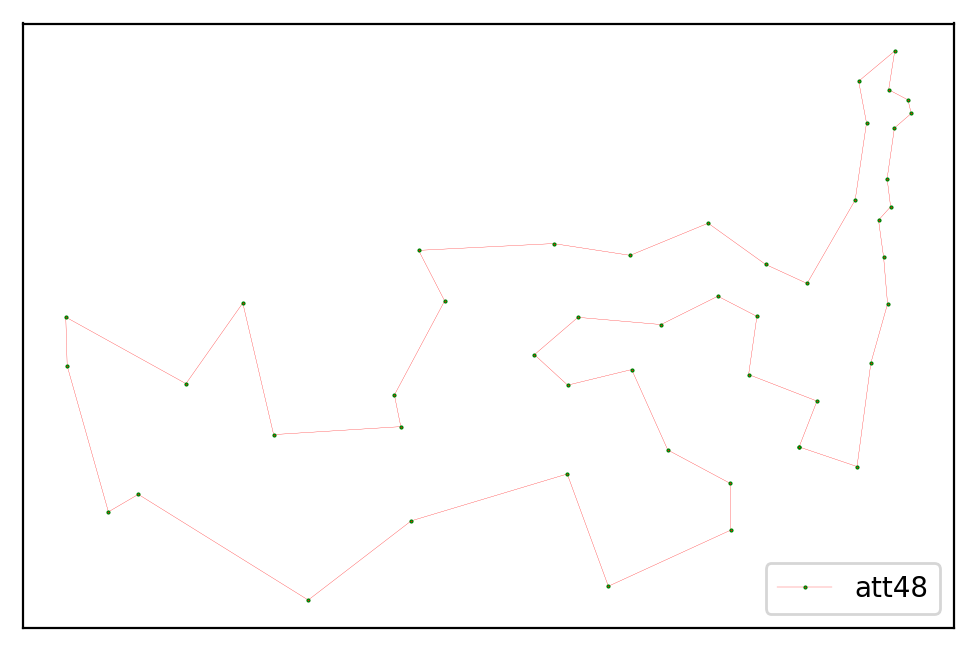

size  29 0
test att532 doesn't have tour
size  29 0
matrix in test bayg29


In [7]:
all_tour_paths = sorted(glob.glob(os.path.join(os.getcwd(), "datasets", "*.tour")))
all_test_paths = sorted(glob.glob(os.path.join(os.getcwd(), "datasets", "*.tsp")))
tours_amount = len(all_tour_paths)
tours_amount = 5
j = 0

for i in range(tours_amount):
    points = print_test_from_filepath(all_test_paths[i])
    permute = print_tour_from_filepath(all_tour_paths[j])
    
    test_name = all_test_paths[i].split("/")[-1][:-4]
    tour_name = all_tour_paths[j].split("/")[-1][:-9]
    
    if(test_name != tour_name):
        print("test {} doesn't have tour".format(test_name))
        continue
    else:
        j += 1
    
    if (points != None):
        x, y = get_x_and_y(points, all_test_paths[i])
        new_x = []
        new_y = []
        for index in permute:
            v = int(index)
            new_x.append(x[v - 1])
            new_y.append(y[v - 1])
        new_x.append(new_x[0])
        new_y.append(new_y[0])

        fig, ax = plt.subplots(dpi=200)
        
        plt.plot(new_x, new_y, 
                 linewidth=0.1, 
                 marker='.', markersize=1, 
                 color="red",
                 markeredgecolor="green",
                 label=test_name)
        plt.legend(loc='lower right')
        plt.xticks([], [])
        plt.yticks([], [])
        plt.show()
    else:
        print("matrix in test {}".format(test_name))